# Project 1

*Elżbieta Jowik* <br>
*Agata Makarewicz*

In [97]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import sys
from utils import NotebookFinder
sys.meta_path.append(NotebookFinder())

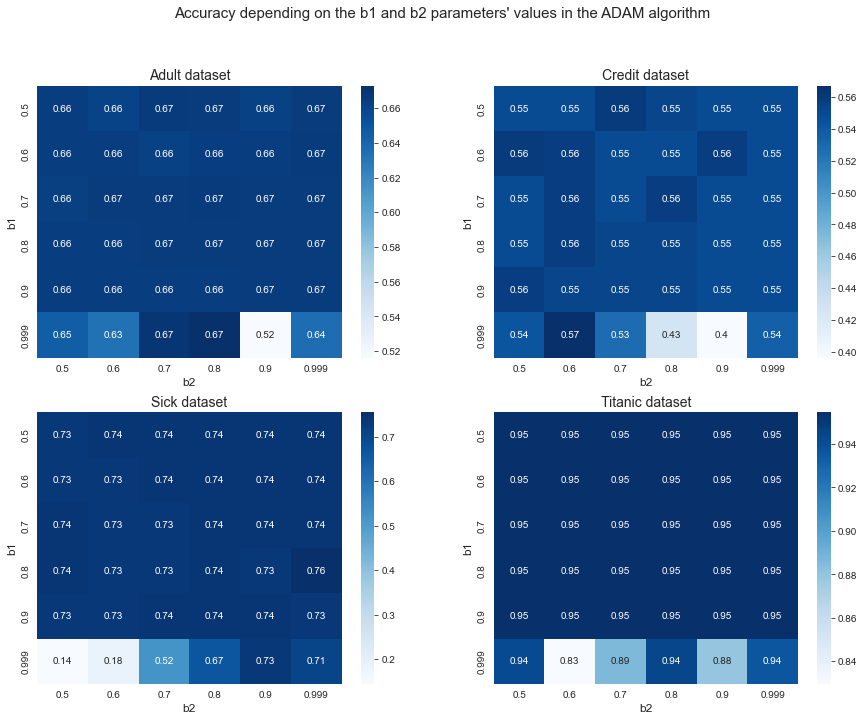

In [93]:
# ADAM - b1/b2 - szybko sie liczy, 15min, co robimy? na razie dla f1_score policzone
fig, axes = plt.subplots(2,2,figsize=(15,11))
datasets = ['adult', 'credit', 'sick', 'titanic']
for i in range(4):
    dataset_name=datasets[i]
    adam = pd.read_csv(f'./../results/adam_b1_b2_{dataset_name}.csv', index_col='b1')
    sns.heatmap(adam, annot=True, cmap="Blues", ax=axes[i//2,i%2]) # collinear features after one-hot-encoding (???)
    axes[i//2,i%2].set_title(dataset_name.capitalize()+' dataset', size=14)
    axes[i//2,i%2].set_xlabel('b2', size=12)
    axes[i//2,i%2].set_ylabel('b1', size=12)
fig.suptitle("Accuracy depending on the b1 and b2 parameters' values in the ADAM algorithm", size=15)
plt.show()

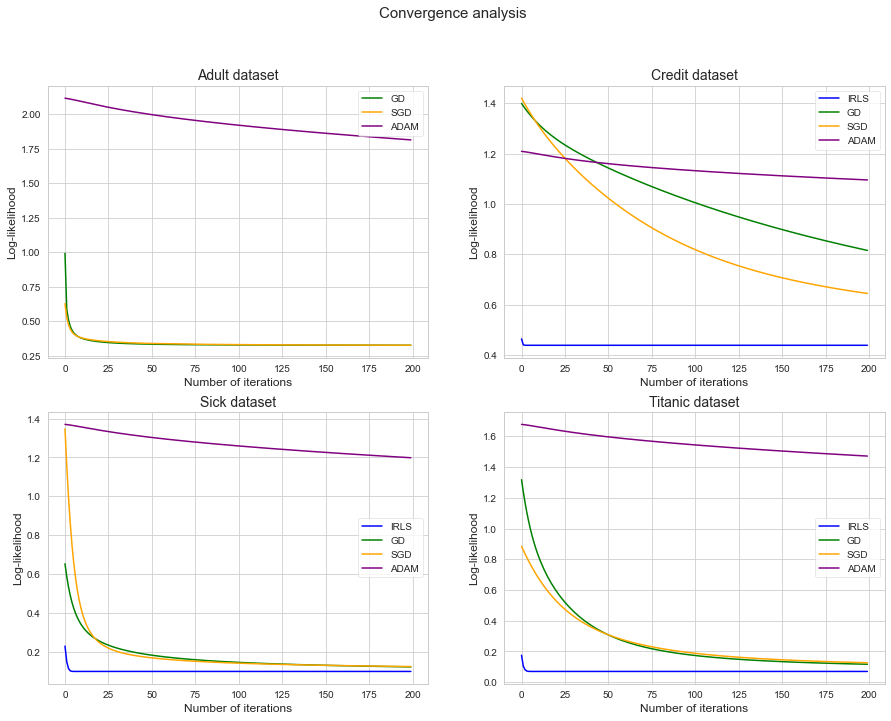

In [100]:
# Convergence (learning rate = 1e-4)
convergence = pd.read_csv('./../results/convergence_analysis_results.csv', index_col='n_iter')
convergence = convergence[:200]
fig, axes = plt.subplots(2,2,figsize=(15,11))
datasets = ['adult', 'credit', 'sick', 'titanic']
algorithms = ['IRLS', 'GD', 'SGD', 'ADAM']
colors = ['blue', 'green', 'orange', 'purple']
for i in range(4):
    dataset_name=datasets[i]
    if i==0:
        convergence_dataset = convergence.iloc[:, 0:3].reset_index()
    else:
        convergence_dataset = convergence.iloc[:, (i*4 - 1):(i*4 + 3)].reset_index()
    for j, col in enumerate(convergence_dataset.columns[1:]):
        if dataset_name=='adult':
            sns.lineplot(data=convergence_dataset, x='n_iter' , y=col, ax=axes[i//2,i%2], label=algorithms[1:][j], color=colors[1:][j])
        else:
            sns.lineplot(data=convergence_dataset, x='n_iter' , y=col, ax=axes[i//2,i%2], label=algorithms[j], color=colors[j])
    axes[i//2,i%2].set_title(dataset_name.capitalize()+' dataset', size=14)
    axes[i//2,i%2].set_xlabel('Number of iterations', size=12)
    axes[i//2,i%2].set_ylabel('Log-likelihood', size=12)
fig.suptitle("Convergence analysis", size=15)
plt.show()

In [ ]:
# epsilon tylko finalny scatterplot ???
# learning rate lineplot per zbiór jedna miara rózne kolorki to rózny lr - zmiana w main

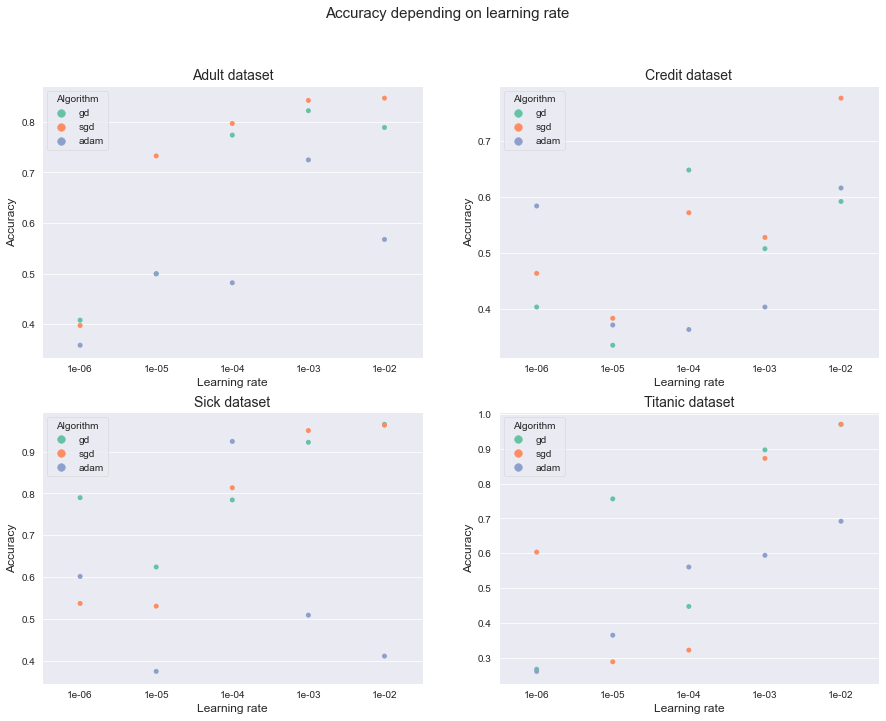

In [95]:
# Learning rate - raczej zmienic na f1_score
fig, axes = plt.subplots(2,2,figsize=(15,11))
datasets = ['adult', 'credit', 'sick', 'titanic']
for i in range(4):
    dataset_name=datasets[i]
    lr_data = pd.read_csv(f'./../results/learning_rate_{dataset_name}.csv')
    for j in range(lr_data.shape[0]):
        lr_data.loc[j, 'Learning rate'] = '{:.0e}'.format(lr_data.loc[j, 'Learning rate'])
    sns.stripplot(x="Learning rate", y="Accuracy", hue="Algorithm",
                   data=lr_data, palette="Set2", dodge=False, jitter=0.0, ax=axes[i//2,i%2])    
    axes[i//2,i%2].set_title(dataset_name.capitalize()+' dataset', size=14)
    # axes[i//2,i%2].set_xlabel('b2', size=12)
    # axes[i//2,i%2].set_ylabel('b1', size=12)
fig.suptitle("Accuracy depending on learning rate", size=15)
plt.show()

In [89]:
# sns.stripplot(x="Learning rate", y="Accuracy", hue="Algorithm",
#                    data=test_m, palette="Set2", dodge=False, jitter=0.0)


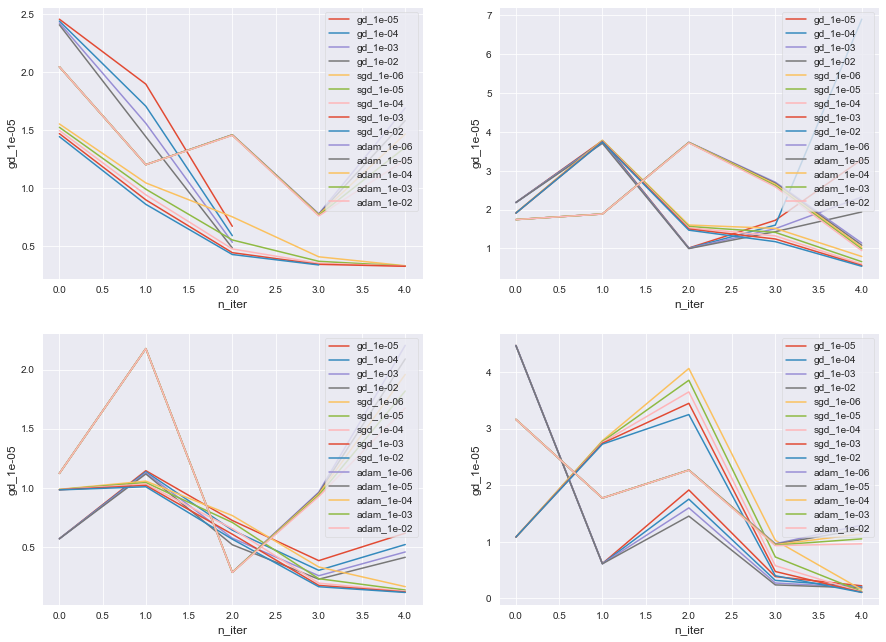

In [87]:
# Learning rate cost
fig, axes = plt.subplots(2,2,figsize=(15,11))
datasets = ['adult', 'credit', 'sick', 'titanic']
for i in range(4):
    dataset_name=datasets[i]
    lr_data = pd.read_csv(f'./../results/learning_rate_cost_{dataset_name}.csv', index_col='n_iter')
    for j, col in enumerate(lr_data.columns[1:]):
        sns.lineplot(data=lr_data, x='n_iter' , y=col, ax=axes[i//2,i%2], label=col)

#     sns.stripplot(x="Learning rate", y="Accuracy", hue="Algorithm",
#                    data=lr_data, palette="Set2", dodge=False, jitter=0.0)    
#     axes[i//2,i%2].set_title(dataset_name.capitalize()+' dataset', size=14)
#     # axes[i//2,i%2].set_xlabel('b2', size=12)
#     # axes[i//2,i%2].set_ylabel('b1', size=12)
# fig.suptitle("Accuracy depending on learning rate", size=15)
# plt.show()


# algorithms = ['GD', 'SGD', 'ADAM']
# colors = [ 'green', 'orange', 'purple']
# for i in range(4):
#     dataset_name=datasets[i]
#     if i==0:
#         convergence_dataset = convergence.iloc[:, 0:3].reset_index()
#     else:
#         convergence_dataset = convergence.iloc[:, (i*4 - 1):(i*4 + 3)].reset_index()
#     for j, col in enumerate(convergence_dataset.columns[1:]):
#         if dataset_name=='adult':
#             sns.lineplot(data=convergence_dataset, x='n_iter' , y=col, ax=axes[i//2,i%2], label=algorithms[1:][j], color=colors[1:][j])
#         else:
#             sns.lineplot(data=convergence_dataset, x='n_iter' , y=col, ax=axes[i//2,i%2], label=algorithms[j], color=colors[j])
#     axes[i//2,i%2].set_title(dataset_name.capitalize()+' dataset', size=14)
#     axes[i//2,i%2].set_xlabel('Number of iterations', size=12)
#     axes[i//2,i%2].set_ylabel('Log-likelihood', size=12)
# fig.suptitle("Convergence analysis", size=15)
# plt.show()

In [85]:
lr_data

,gd_1e-06,gd_1e-05,gd_1e-04,gd_1e-03,gd_1e-02,sgd_1e-06,sgd_1e-05,sgd_1e-04,sgd_1e-03,sgd_1e-02,adam_1e-06,adam_1e-05,adam_1e-04,adam_1e-03,adam_1e-02
n_iter,,,,,,,,,,,,,,,
0,2.471338,2.454855,2.438525,2.422345,2.406315,1.553084,1.524237,1.496433,1.469643,1.443843,2.045332,2.045315,2.045295,2.045272,2.045249
1,2.144735,1.895757,1.705506,1.558547,1.442879,1.045197,0.991158,0.942611,0.899315,0.860868,1.202434,1.202315,1.202177,1.202025,1.201864
2,0.787912,0.671735,0.591105,0.533928,0.485431,0.753270,0.554130,0.476793,0.444626,0.428748,1.460239,1.459140,1.457862,1.456459,1.454966
3,NaN,NaN,NaN,NaN,NaN,0.409006,0.370326,0.353346,0.344120,0.338933,0.778957,0.775199,0.770884,0.766219,0.761341
4,NaN,NaN,NaN,NaN,NaN,0.332028,0.330252,0.328724,0.327405,NaN,1.690562,1.582144,1.466563,1.351980,1.242678


In [ ]:
# set 2 palette 
# ['#66c2a5','#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']